# Advanced Certification in AIML
## A Program by IIIT-H and TalentSprint



### Learning Objective

At the end of the experiment, you will be able to :

- Understand the concept of Gradient descent method
- Observe the effect of learning rate

In [ ]:
#@title Experiment Walkthrough
#@markdown Gradient descent and learning rate variations
from IPython.display import HTML
HTML("""<video width='520' height='240' controls>
<source src="https://cdn.talentsprint.com/aiml/AIML_BATCH_HYD_7/Week_1/gradient_descent.mp4" type='video/mp4'>
</video>""")

##Dataset

###Description


The dataset consists of two columns and 90 rows. Each column represents a characteristic of a simple pendulum i.e l (length) and t (time period). The dataset describes the relationship between the l and t which is  $l∝t^2$ .


##AI/ML Technique

#### Gradient Descent

Gradient Descent is used while training a machine learning model. It is an optimization algorithm, based on first order gradients, that tweaks it’s parameters iteratively to minimize a given function to its local minimum and global minima if the function is convex.

## Keywords



- Gradient Descent
- Learning Rate
- Error Function
- Decay 

## Expected time : 60 mins

## Setup Steps

In [1]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "2100121" #@param {type:"string"}

In [2]:
#@title Please enter your password (normally your phone number) to continue: { run: "auto", display-mode: "form" }
password = "5142192291" #@param {type:"string"}

In [3]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()
  
notebook= "U2W8_07_BatchGD_LRdecay_A" #name of the notebook

def setup(): 
    ipython.magic("sx wget https://cdn.talentsprint.com/aiml/Experiment_related_data/week1/Exp1/AIML_DS_REGR01_SIMPLEPENDULUMOSCILLATIONDATA.txt")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")
    
    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:        
        print(r["err"])
        return None        
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None
    
    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getWalkthrough() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional, 
              "concepts" : Concepts, "record_id" : submission_id, 
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook, "feedback_walkthrough":Walkthrough ,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}

      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:        
        print(r["err"])
        return None   
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://aiml.iiith.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id
    

def getAdditional():
  try:
    if not Additional: 
      raise NameError
    else:
      return Additional  
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None
  
def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None
  
  
def getWalkthrough():
  try:
    if not Walkthrough:
      raise NameError
    else:
      return Walkthrough
  except NameError:
    print ("Please answer Walkthrough Question")
    return None
  
def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None
  

def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError 
    else: 
      return Answer
  except NameError:
    print ("Please answer Question")
    return None
  

def getId():
  try: 
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup 
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup() 
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


In [4]:
# Import the required Packages
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# Load the data by using pandas read_csv()
data = pd.read_csv("AIML_DS_REGR01_SIMPLEPENDULUMOSCILLATIONDATA.txt", sep=" ", header=None, names=['l', 't'])

# YOUR CODE HERE : Display the first 5 rows of dataframe 'data'
data.head()
# YOUR CODE HERE : Display the last 5 rows of dataframe 'data'
data.tail()

,l,t
85,0.95,1.9841
86,0.96,2.0066
87,0.97,2.0493
88,0.98,2.0503
89,0.99,2.0214


In [6]:
l = data['l'].values
t = data['t'].values
# Get the square of time period
tsq = t * t

### Gradient Descent

Gradient descent is an optimization algorithm used to find the values of parameters (coefficients) of a function that minimizes a cost function.

A cost function is a measure of how wrong the model is in terms of its ability to estimate the relationship between X and y. This is typically expressed as a difference or distance between the predicted value and the actual value.

#### Batch Gradient Descent

Batch gradient descent is a variation of the gradient descent algorithm that calculates the error for each example in the training dataset, but only updates the model after all training examples have been evaluated. 

Firstly, we calculate the cost function which is $E$ = $(y - y_i)^2$ and we tweak the slope m and bias c to reduce the cost function.

$\frac{\partial E_i }{\partial m}$ = $ \frac{-2}{n} \sum_{i=1}^{n} (y_i - (mx_i + c)) * x_i$

$\frac{\partial E_i }{\partial c}$ = $ \frac{-2}{n} \sum_{i=1}^{n}(y_i - (mx_i + c))$

And then we update the slope and bias with with change in slope $\Delta m$ and change in bias $\Delta c$ with learning rate $eta$

$m$  = $m - \Delta m * eta$

$c$  = $c - \Delta c * eta$



In [10]:
"""
The function 'train' updates the values of m and c and calculates error. 
The loss is minimized due to the changed values of m and c.
The new values m, c and the minimized error is returned.
"""
def train(x, y, m, c, eta):
    const = - 2.0/len(y)
    ycalc = m * x + c
    #YOUR CODE HERE : Calculate "delta_m" and "delta_c"
    delta_m = const * sum(x * (y - ycalc))
    delta_c = const * sum(y - ycalc)
    m = m - delta_m * eta
    c = c - delta_c * eta
    error = sum((y - ycalc)**2)/len(y)
    return m, c, error

### Effect of varying LR on error and final line

Let us vary LR and find how the error decreases in each case, and how the final line looks, by training each case for the same number of iterations - 2000.

### $\eta$ = 0.1

In [11]:
# Save errors
errs_1 = []
m, c = 0, 0
eta = 0.1
# Call the train() method for 2000 iterations to update m and c and get error value with eta = 0.1.
for iteration in range(2000):
    #Call train function below
    m, c, error = train(l, tsq, m, c, eta) # YOUR CODE HERE : Call 'train' function defined above by passing 'l', 'tsq', 'm', 'c', 'eta' as it's arguments.
    # YOUR CODE HERE : append to "errs_1" to append the errors for plotting later
    errs_1.append(error)
# Save final line
m_1, c_1 = m, c

### $\eta$ = 0.01

In [12]:
errs_01 = []
m, c = 0, 0
eta = 0.01
# Call the train() method for 2000 iterations to update m and c and get error value with eta = 0.01.
for iteration in range(2000):
    m, c, error = train(l, tsq, m, c, eta) # YOUR CODE HERE : Call 'train' function defined above by passing 'l', 'tsq', 'm', 'c', 'eta' as it's arguments.
    errs_01.append(error)

# Save final line
m_01, c_01 = m, c

### $\eta$ = 0.001

In [13]:
errs_001 = []
m, c = 0, 0
eta = 0.001
# Call the train() method for 2000 iterations to update m and c and get error value with eta = 0.001.
for iteration in range(2000):
    m, c, error = train(l, tsq, m, c, eta) 
    errs_001.append(error)

# Save final line
m_001, c_001 = m, c

### $\eta$ = 0.0001

In [14]:
errs_0001 = []
m, c = 0, 0
eta = 0.0001
# Call the train() method for 2000 iterations to update m and c and get error value with eta = 0.0001. 
for iteration in range(2000):
    m, c, error = train(l, tsq, m, c, eta)
    errs_0001.append(error)

# Save final line
m_0001, c_0001 = m, c

In [15]:
# Find the lines
y_1 = m_1 * l + c_1
y_01 = m_01 * l + c_01
y_001 = m_001 * l + c_001
y_0001 = m_0001 * l + c_0001

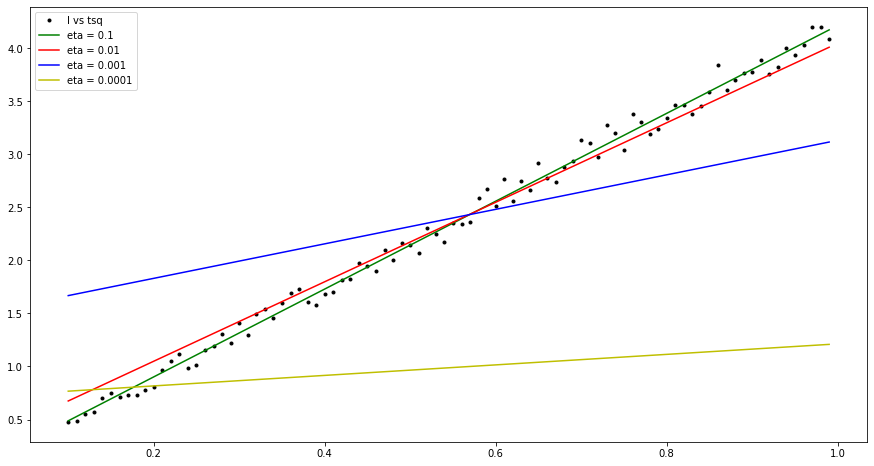

In [16]:
# YOUR CODE HERE : Plot all the lines calculated above vs 𝜂
plt.figure(figsize=(15, 8))
plt.plot(l, tsq, '.k')
plt.plot(l,y_1, 'g')
plt.plot(l, y_01, 'r')
plt.plot(l,y_001, 'b')
plt.plot(l,y_0001, 'y')
plt.legend(["l vs tsq","eta = 0.1","eta = 0.01","eta = 0.001","eta = 0.0001"])
plt.show()

Thus, we see that higher learning rates reach the best fit faster than lower learning rates (obviously).

## Plot of errors vs epochs for each $\eta$

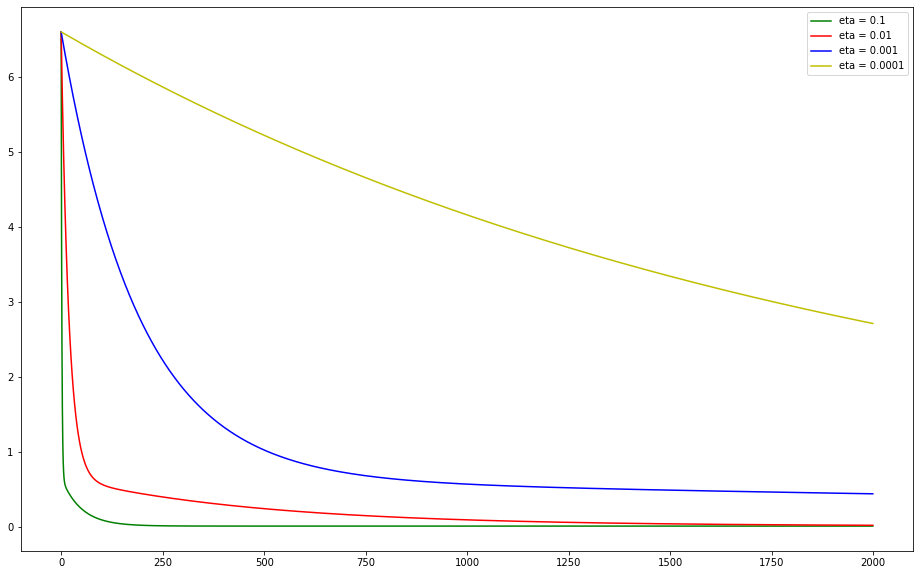

In [17]:
epochs = range(0,2000)
plt.figure(figsize=(16,10))
#YOUR CODE HERE :  plot "epochs" versus errs_1, errs_01, errs_02 (each in a different color)
plt.plot(epochs, errs_1, "g")
plt.plot(epochs, errs_01,"r")
plt.plot(epochs, errs_001,"b")
plt.plot(epochs, errs_0001,"y")
plt.legend(["eta = 0.1","eta = 0.01","eta = 0.001","eta = 0.0001"])
plt.show()

# With LR Decay

In some cases, the learning rate might be too high to give good fitting lines. For example, let us train with constant LR of 0.8 and get the final line after 1000 iterations:

### $\eta$ = 0.8

In [20]:
errs = []
m, c = 0, 0

# YOUR CODE HERE : Call the train() method for 1000 iterations to update m and c and get error value with constant eta = 0.8.
for times in range(1000):
    #Call train function below
    m, c, error = train(l, tsq, m, c, eta)# YOUR CODE HERE : Call 'train' function defined above by passing 'l', 'tsq', 'm', 'c', 'eta' as it's arguments.
    # YOUR CODE HERE : append to "errs" to append the errors for plotting later
    errs.append(error)
    
m_normal, c_normal = m, c

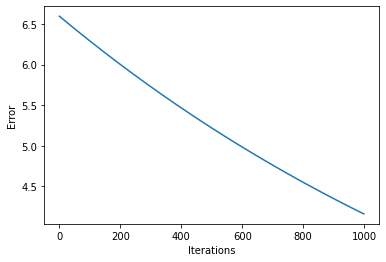

In [21]:
# YOUR CODE HERE : Plot errors vs iterations
plt.plot(range(len(errs)), errs)
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.show()

We see that the error quickly goes to almost 0, but after some iterations blows up.

Let us check the "best fit" line that is found:

In [22]:
print("m = {0:.6} c = {1:.6} Error = {2:.6}".format(m_normal, c_normal, errs[-1]))

m = 0.276274 c = 0.407901 Error = 4.158


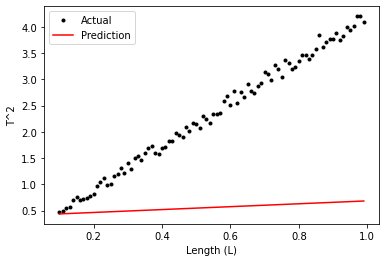

In [23]:
y = m_normal * l + c_normal 
plt.plot(l, tsq, '.k', label = 'Actual')
plt.plot(l,y,"r", label = 'Prediction')
plt.xlabel("Length (L)")
plt.ylabel("T^2")
plt.legend()
plt.show()

Clearly this is not ideal.

This was a simple case where we can see the learning rate is too high. There might be cases where it is not so simple to identify this. Also, having a low learning rate is not good because training time would be too high!

**Solution: Decay the learning rate.**

Now let us train another model with decaying lr. But let us not decay lr below 0.0001.

In [25]:
errs_decay = []
m, c = 0, 0
eta = 0.5
decay_factor = 0.99
# Call the train() method for 1000 iterations to update m and c and get error value with decaying eta.
for iteration in range(1000):
    eta = max(0.0001, eta * decay_factor)
    m, c, error = train(l, tsq, m, c, eta)
    errs_decay.append(error)

m_decay, c_decay = m, c

In [26]:
print("m = {0:.6} c = {1:.6} Error = {2:.6}".format(m_decay, c_decay, errs_decay[-1]))

m = 4.12371 c = 0.0837925 Error = 0.00708933


Let us see the plot of error vs iterations:

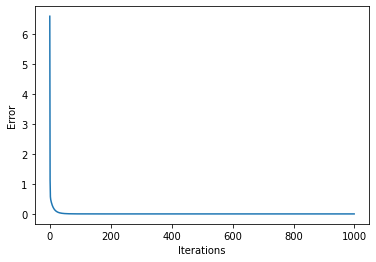

In [27]:
plt.plot(range(len(errs_decay)), errs_decay)
plt.xlabel("Iterations")
plt.ylabel("Error")
plt.show()

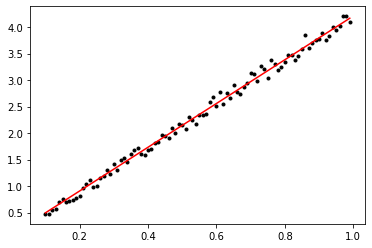

In [29]:
y = m_decay * l + c_decay # YOUR CODE HERE : Calculate the line equation where m_decay is slope, l is x value and  c_decay is constant 

# YOUR CODE HERE : Plot l vs tsq
# YOUR CODE HERE : Plot l vs y

plt.plot(l, tsq, '.k')
plt.plot(l,y,"r")
plt.show()

Thus, this is correct.

### Please answer the questions below to complete the experiment:

In [30]:
#@title Gradient descent always finds the global minima? { run: "auto", form-width: "500px", display-mode: "form" }
Answer = "False" #@param ["","True","False"]


In [31]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good, But Not Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [32]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "none" #@param {type:"string"}


In [33]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]


In [34]:
#@title  Experiment walkthrough video? { run: "auto", vertical-output: true, display-mode: "form" }
Walkthrough = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [35]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [36]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [37]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 7996
Date of submission:  21 Oct 2020
Time of submission:  12:28:04
View your submissions: https://aiml.iiith.talentsprint.com/notebook_submissions
